## Question 1: Redpanda version
Now let's find out the version of redpandas.

For that, check the output of the command **rpk help** inside the container. The name of the container is redpanda-1.

Find out what you need to execute based on the help output.

What's the version, based on the output of the command you executed? (copy the entire version)

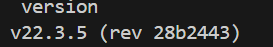

### Answer:

- v22.3.5

## Question 2. Creating a topic
Before we can send data to the redpanda server, we need to create a topic. We do it also with the rpk command we used previously for figuring out the version of redpandas.

Read the output of help and based on it, create a topic with name test-topic

What's the output of the command for creating a topic? Include the entire output in your answer.

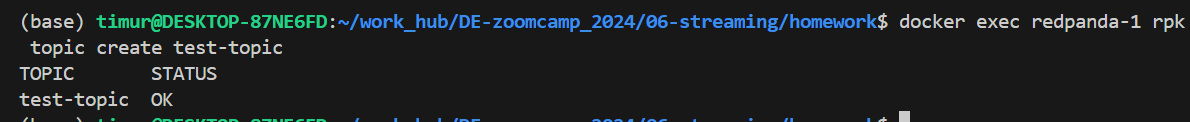

### Answer: 
- topic: test-topic
- status: ok

## Question 3. Connecting to the Kafka server
We need to make sure we can connect to the server, so later we can send some data to its topics

First, let's install the kafka connector (up to you if you want to have a separate virtual environment for that)

```bash
pip install kafka-python
```

You can start a jupyter notebook in your solution folder or create a script

Let's try to connect to our server:

In [2]:
import json
import time 

from kafka import KafkaProducer

def json_serializer(data):
    return json.dumps(data).encode('utf-8')

server = 'localhost:9092'

producer = KafkaProducer(
    bootstrap_servers=[server],
    value_serializer=json_serializer
)

producer.bootstrap_connected()

True

Provided that you can connect to the server, what's the output of the last command?

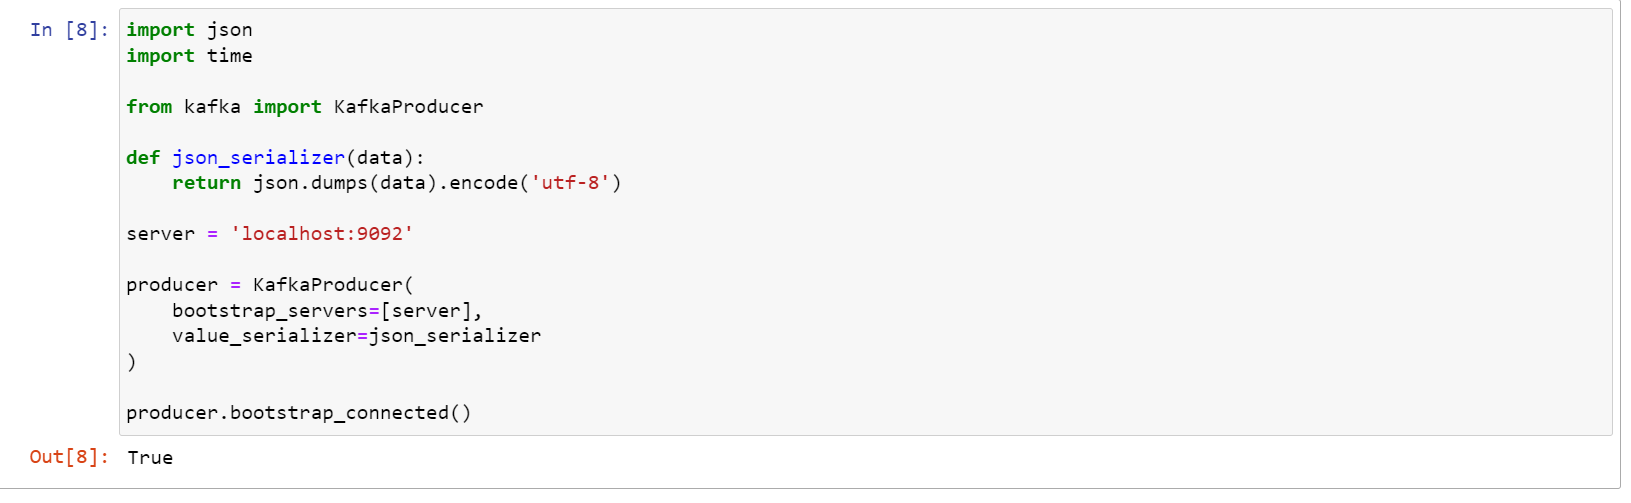

### Answer:
- True

## Question 4. Sending data to the stream
Now we're ready to send some test data:

In [13]:
t0 = time.time()

topic_name = 'test-topic'

for i in range(10):
    message = {'number': i}
    producer.send(topic_name, value=message)
    print(f"Sent: {message}")
    time.sleep(0.05)

producer.flush()

t1 = time.time()
print(f'took {(t1 - t0):.2f} seconds')

Sent: {'number': 0}
Sent: {'number': 1}
Sent: {'number': 2}
Sent: {'number': 3}
Sent: {'number': 4}
Sent: {'number': 5}
Sent: {'number': 6}
Sent: {'number': 7}
Sent: {'number': 8}
Sent: {'number': 9}
took 1.50 seconds


How much time did it take? Where did it spend most of the time?

### Answer:
- It took 0.52 seconds
- Sending the messages spent most of that time

## Reading data with rpk
You can see the messages that you send to the topic with rpk:


```bash
rpk topic consume test-topic```

## Sending the taxi data
Now let's send our actual data:

```bash
Read the green csv.gz file
We will only need these columns:
    'lpep_pickup_datetime',
    'lpep_dropoff_datetime',
    'PULocationID',
    'DOLocationID',
    'passenger_count',
    'trip_distance',
    'tip_amount'
```

Load the data

In [4]:
import pandas as pd

In [5]:
df_green = pd.read_csv('https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2019-10.csv.gz')

/tmp/ipykernel_2846/1666206236.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_green = pd.read_csv('https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2019-10.csv.gz')


In [19]:
df_green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [6]:
columns = ['lpep_pickup_datetime',
'lpep_dropoff_datetime',
'PULocationID',
'DOLocationID',
'passenger_count',
'trip_distance',
'tip_amount']

In [7]:
df_green = df_green[columns]

In [8]:
df_green

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount
0,2019-10-01 00:26:02,2019-10-01 00:39:58,112,196,1.0,5.88,0.00
1,2019-10-01 00:18:11,2019-10-01 00:22:38,43,263,1.0,0.80,0.00
2,2019-10-01 00:09:31,2019-10-01 00:24:47,255,228,2.0,7.50,0.00
3,2019-10-01 00:37:40,2019-10-01 00:41:49,181,181,1.0,0.90,0.00
4,2019-10-01 00:08:13,2019-10-01 00:17:56,97,188,1.0,2.52,2.26
...,...,...,...,...,...,...,...
476381,2019-10-31 23:30:00,2019-11-01 00:00:00,65,102,NaN,7.04,0.00
476382,2019-10-31 23:03:00,2019-10-31 23:24:00,129,136,NaN,0.00,0.00
476383,2019-10-31 23:02:00,2019-10-31 23:23:00,61,222,NaN,3.90,0.00
476384,2019-10-31 23:42:00,2019-10-31 23:56:00,76,39,NaN,3.08,0.00


Send the data to kafka

Iterate over the records in the dataframe



In [ ]:
t0 = time.time()

topic_name = 'green-trips'

for row in df_green.itertuples(index=False):
    row_dict = {col: getattr(row, col) for col in row._fields}
    print(row_dict)
    producer.send(topic_name, value=row_dict)
    print(f"Sent: {row_dict}")
    time.sleep(0.05)

producer.flush()

t1 = time.time()
print(f'took {(t1 - t0):.2f} seconds')

## Question 5: Sending the Trip Data
- Create a topic green-trips and send the data there
- How much time in seconds did it take? (You can round it to a whole number)
- Make sure you don't include sleeps in your code

create a topic green-trips

```bash

docker exec redpanda-1 rpk topic create green-trips
```

send the data to this topic

In [11]:
t0 = time.time()

topic_name = 'green-trips'

for row in df_green.itertuples(index=False):
    row_dict = {col: getattr(row, col) for col in row._fields}
    producer.send(topic_name, value=row_dict)

producer.flush()

t1 = time.time()
print(f'took {(t1 - t0):.2f} seconds')

took 90.43 seconds


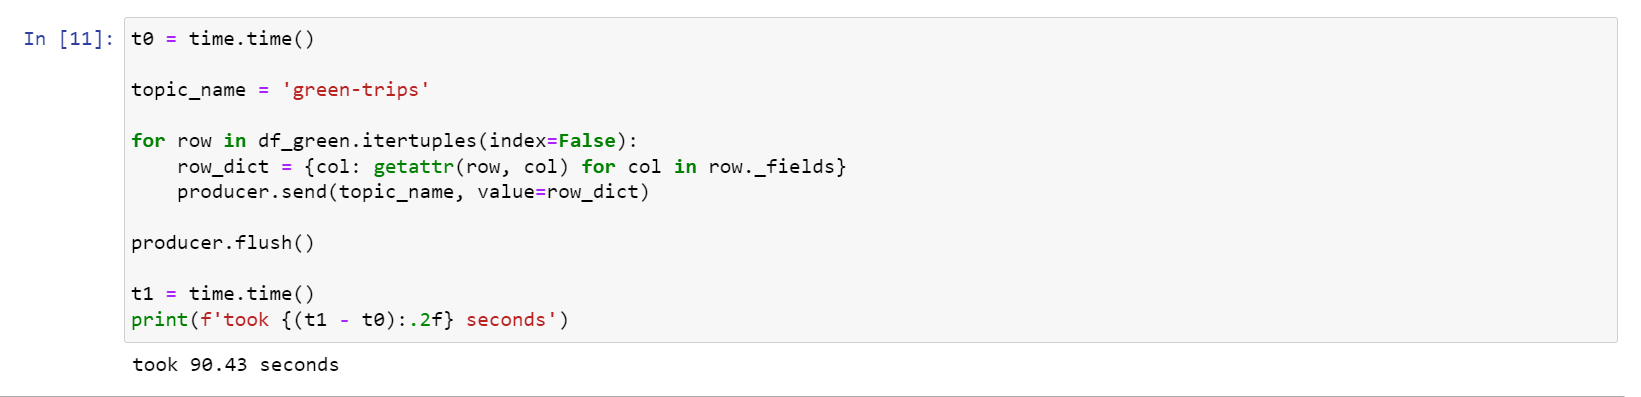

## Creating the PySpark consumer